<a href="https://colab.research.google.com/github/yasmine-oukemoum/predecting-handwriting-digits/blob/main/predecting_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy

In [2]:
pip install matplotlib

In [3]:
pip install opencv-python

In [4]:
pip install tensorflow

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [18]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)
model.save('handwritten.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8734 - loss: 0.4620
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9661 - loss: 0.1101
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9778 - loss: 0.0690
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9837 - loss: 0.0507
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9887 - loss: 0.0351


In [11]:
model=tf.keras.models.load_model('handwritten.keras')
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.1079
0.97079998254776
0.09197939187288284


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
The number is probably a 3


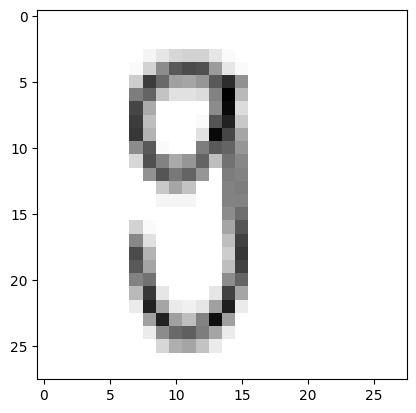

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
The number is probably a 1


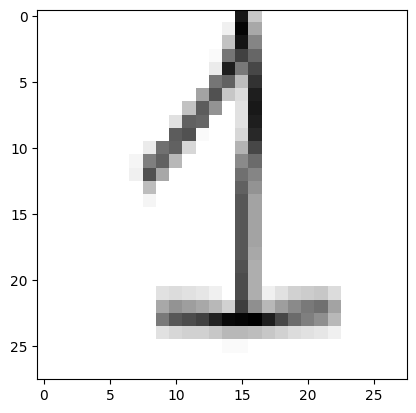

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
The number is probably a 3


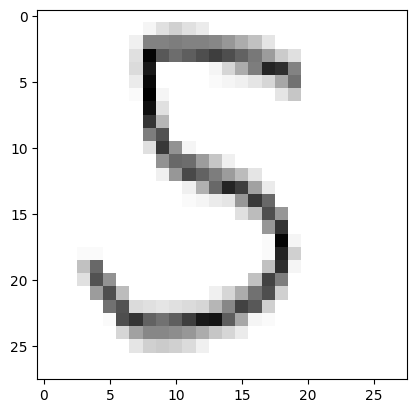

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
The number is probably a 3


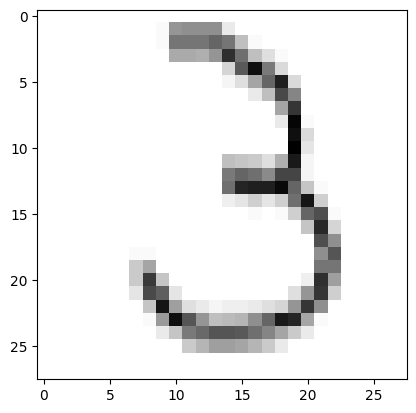

In [19]:
image_number=1
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
      img=cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
      img = cv2.resize(img, (28, 28))  # if your model expects 28x28
      img=np.invert(np.array([img]))
      prediction=model.predict(img)
      print('The number is probably a {}'.format(np.argmax(prediction)))
      plt.imshow(img[0],cmap=plt.cm.binary)
      plt.show()
    except:
      print('Error')
    finally:
      image_number+=1